# Tips

### Introduction:

This exercise was created based on the tutorial and documentation from [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/index.html)  
The dataset being used is tips from Seaborn.

### Step 1. Import the necessary libraries:

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

sns.set(style="ticks", color_codes=True)

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/Visualization/Tips/tips.csv). 

### Step 3. Assign it to a variable called tips

In [128]:
tips = pd.read_csv('tips.csv')
tips.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


### Step 4. Delete the Unnamed 0 column

In [129]:
tips = tips.loc[:,"total_bill":]
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Step 5. Plot the total_bill column histogram

<IPython.core.display.Javascript object>


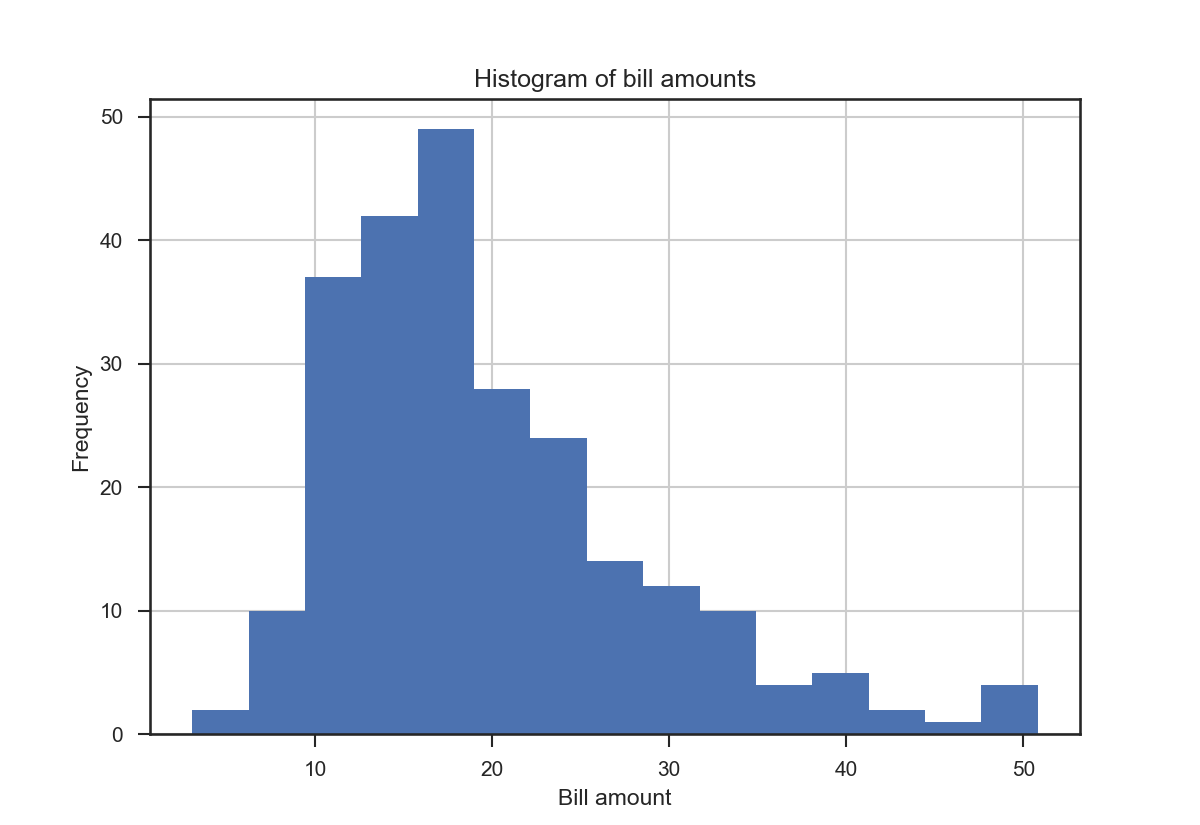

In [130]:
plt.figure()
ax = tips.total_bill.hist(bins = 15)
ax.set_title('Histogram of bill amounts')
ax.set_ylabel('Frequency')
ax.set_xlabel('Bill amount');

### Step 6. Create a scatter plot presenting the relationship between total_bill and tip

<IPython.core.display.Javascript object>


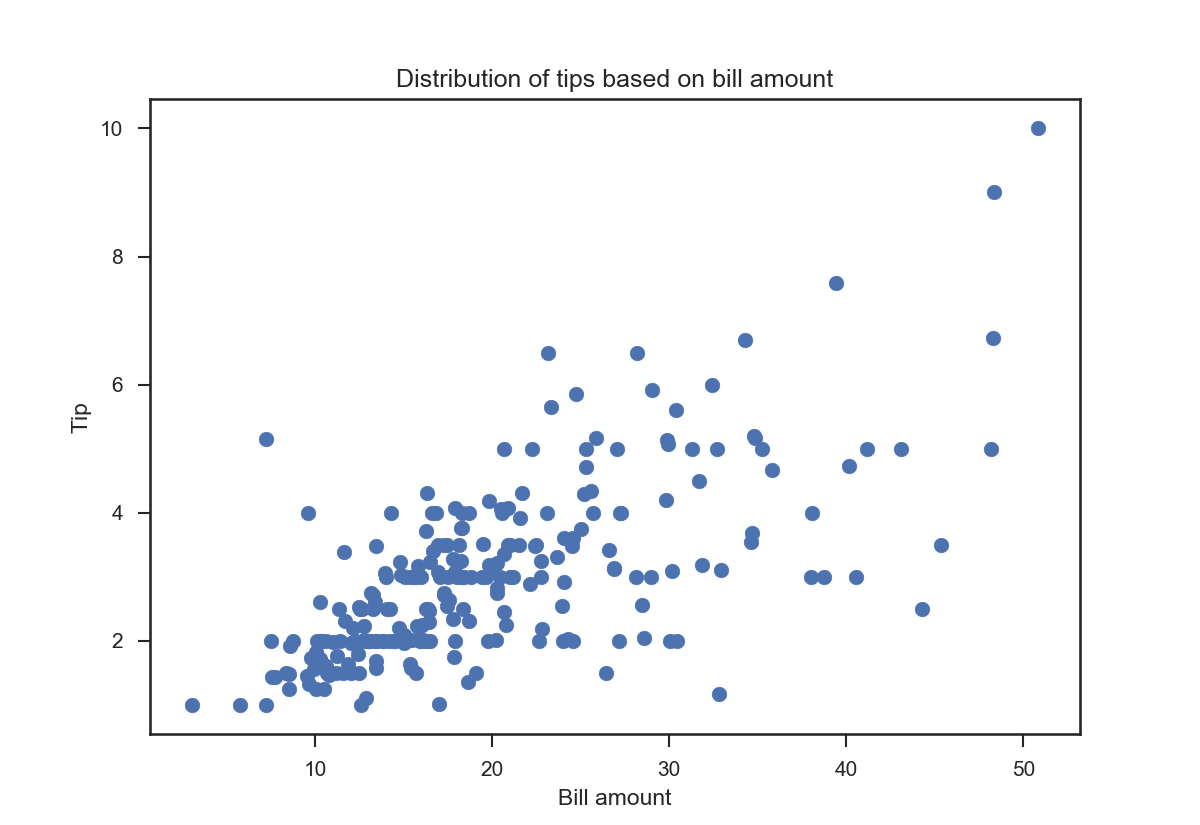

In [131]:
plt.figure()
plt.scatter(tips.total_bill, tips.tip)
ax = plt.gca()
ax.set_title('Distribution of tips based on bill amount')
ax.set_xlabel('Bill amount')
ax.set_ylabel('Tip');

### Step 7.  Create one image with the relationship of total_bill, tip and size.
#### Hint: It is just one function.

<IPython.core.display.Javascript object>


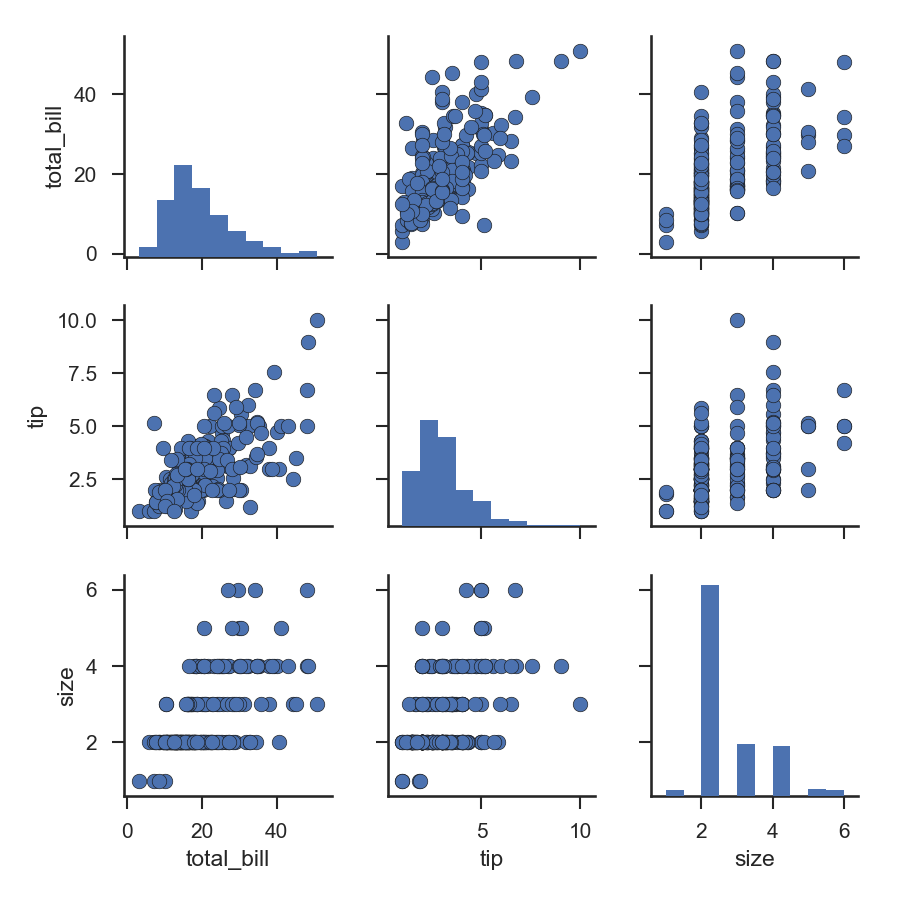

In [132]:
sns.pairplot(tips, size=2, plot_kws = {'edgecolor': 'k'});

### Step 8. Present the realationship between days and total_bill value

<IPython.core.display.Javascript object>


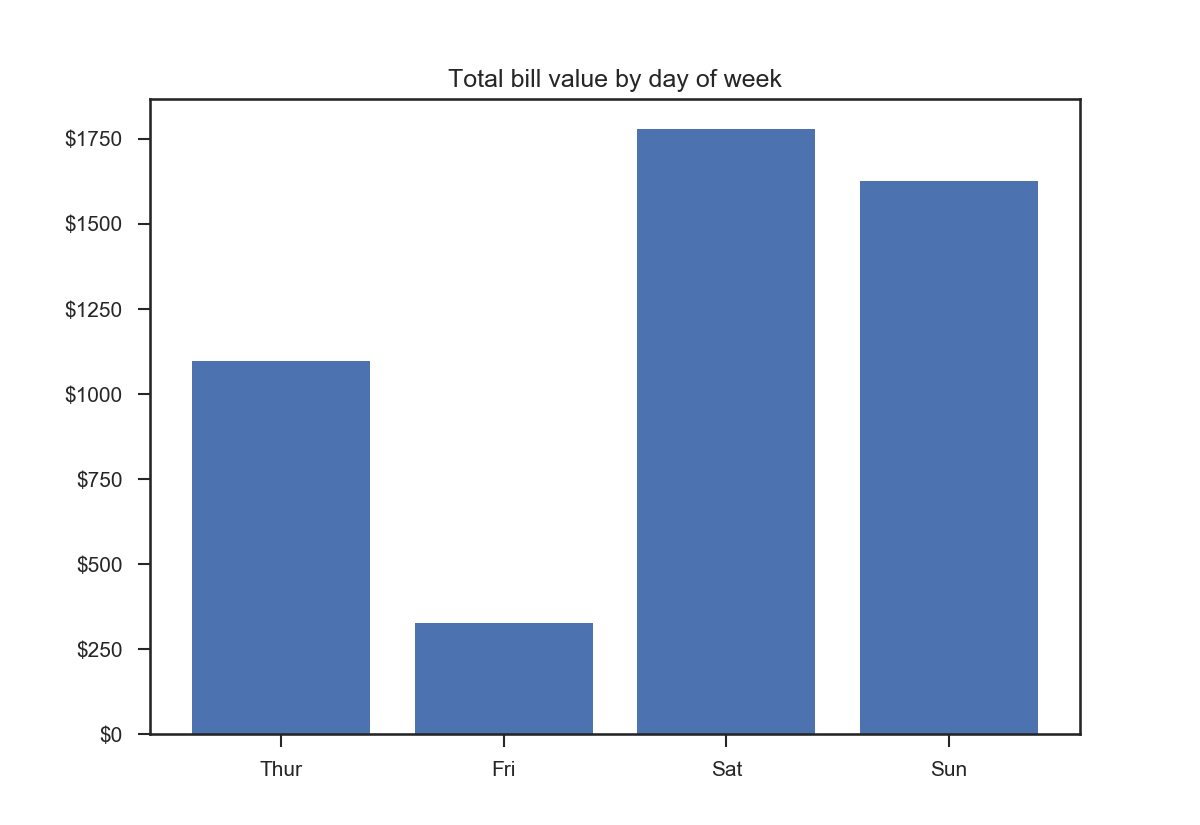

In [133]:
bill_by_day = tips.groupby('day').agg({'total_bill': np.sum})

dayOfWeek={'Thur': 0, 'Fri': 1, 'Sat': 2, 'Sun': 3}
bill_by_day['dayOfWeek'] = bill_by_day.index.map(lambda x: dayOfWeek[x])
plt.figure()
bill_by_day.sort_values('dayOfWeek', inplace= True)
plt.bar(bill_by_day.dayOfWeek, bill_by_day.total_bill)
plt.gca().set_xticks(bill_by_day.dayOfWeek)
plt.gca().set_xticklabels(dayOfWeek.keys())
plt.gca().set_title('Total bill value by day of week')
plt.gca().set_yticklabels(list(map(lambda x: '$' + str(int(x)), plt.gca().get_yticks())));


### Step 9. Create a scatter plot with the day as the y-axis and tip as the x-axis, differ the dots by sex

<IPython.core.display.Javascript object>


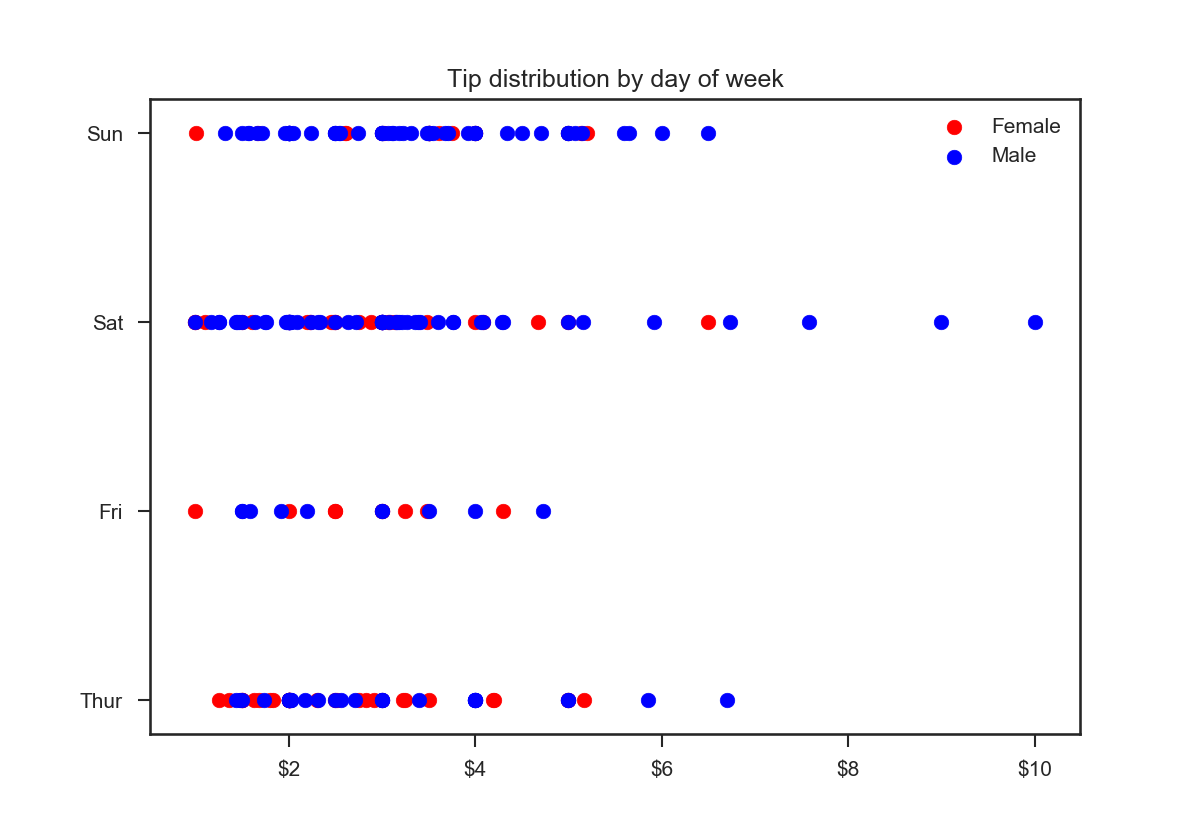

In [134]:
plt.figure()
dayOfWeek={'Thur': 0, 'Fri': 1, 'Sat': 2, 'Sun': 3}
colors = {'Female': 'red', 'Male': 'blue'}
tip_by_day = tips
tip_by_day['dayOfWeek'] = tip_by_day.day.map(dayOfWeek)
tip_by_day.sort_values('dayOfWeek', inplace= True)
for key, val in colors.items():
    filtered = tip_by_day[tip_by_day.sex == key]
    plt.scatter(filtered.tip, filtered.day.map(dayOfWeek), c = val, label = key)

plt.legend()
plt.yticks(list(dayOfWeek.values()), list(dayOfWeek.keys()))
plt.gca().set_title('Tip distribution by day of week')
plt.gca().set_xticklabels(list(map(lambda x: '$' + str(int(x)), plt.gca().get_xticks())));





### Step 10.  Create a box plot presenting the total_bill per day differetiation the time (Dinner or Lunch)

<IPython.core.display.Javascript object>


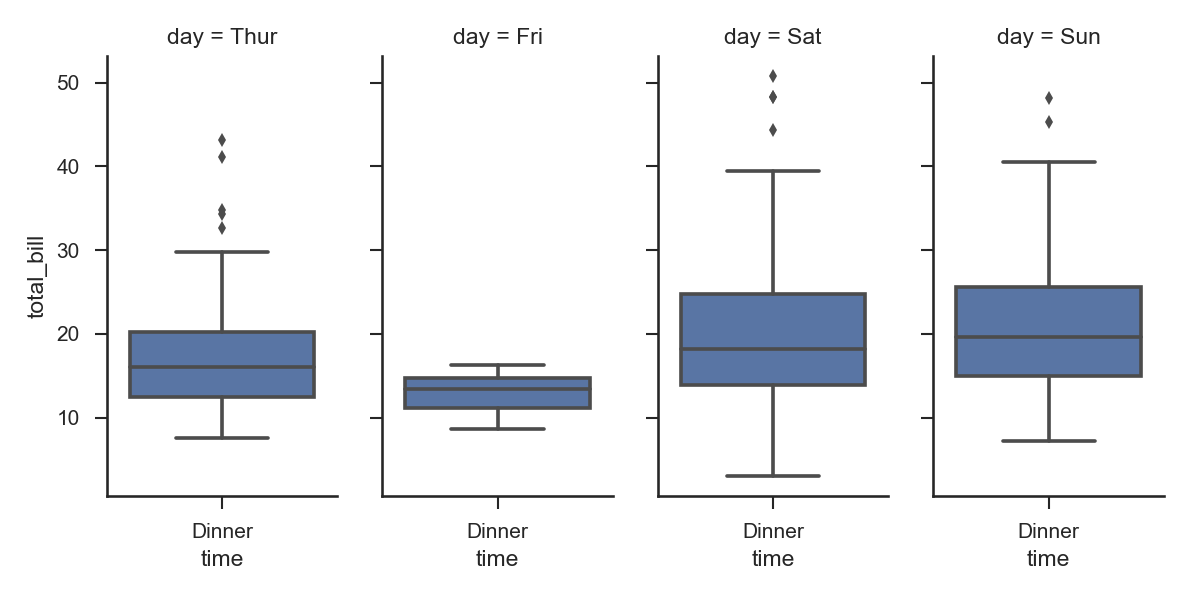

In [139]:


g = sns.FacetGrid(tips, col="day", size=4, aspect=.5)
g = g.map(sns.boxplot, "time", "total_bill")

### Step 11. Create two histograms of the tip value based for Dinner and Lunch. They must be side by side.

<IPython.core.display.Javascript object>


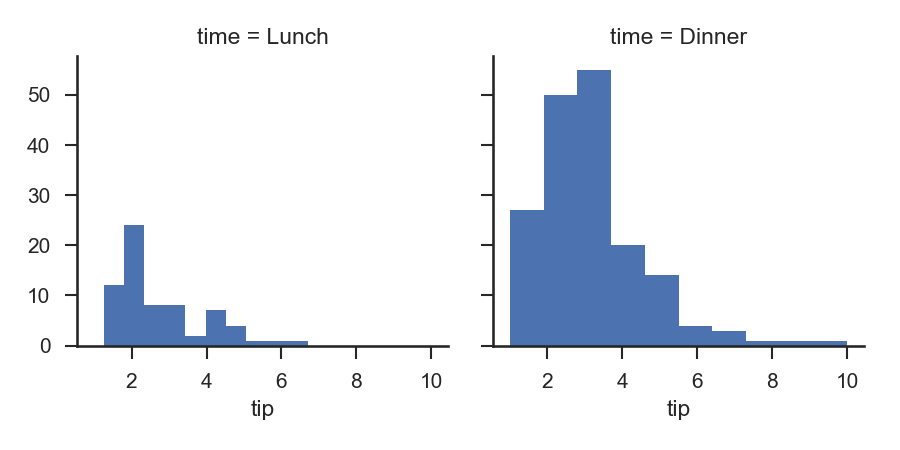

In [136]:
g = sns.FacetGrid(tips, col = 'time')
g.map(plt.hist, "tip")

### Step 12. Create two scatterplots graphs, one for Male and another for Female, presenting the total_bill value and tip relationship, differing by smoker or no smoker
### They must be side by side.

<IPython.core.display.Javascript object>


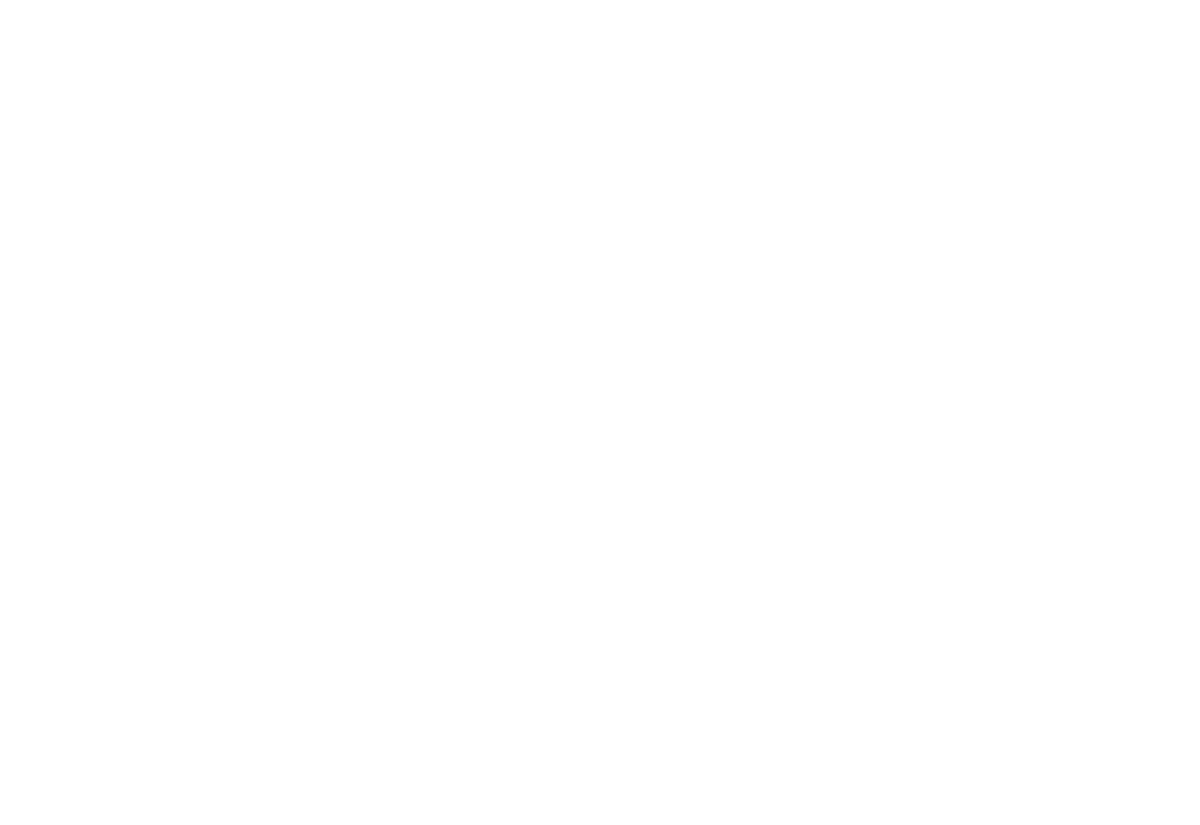

<IPython.core.display.Javascript object>


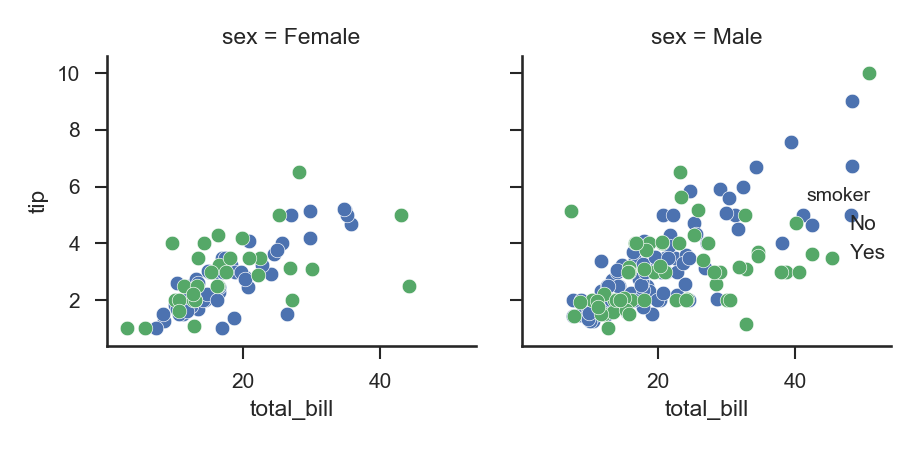

In [137]:
plt.figure()
g = sns.FacetGrid(tips, col="sex", hue = "smoker")
g = g.map(plt.scatter, "total_bill", "tip", edgecolor = "w")
g.add_legend();

### BONUS: Create your own question and answer it using a graph.